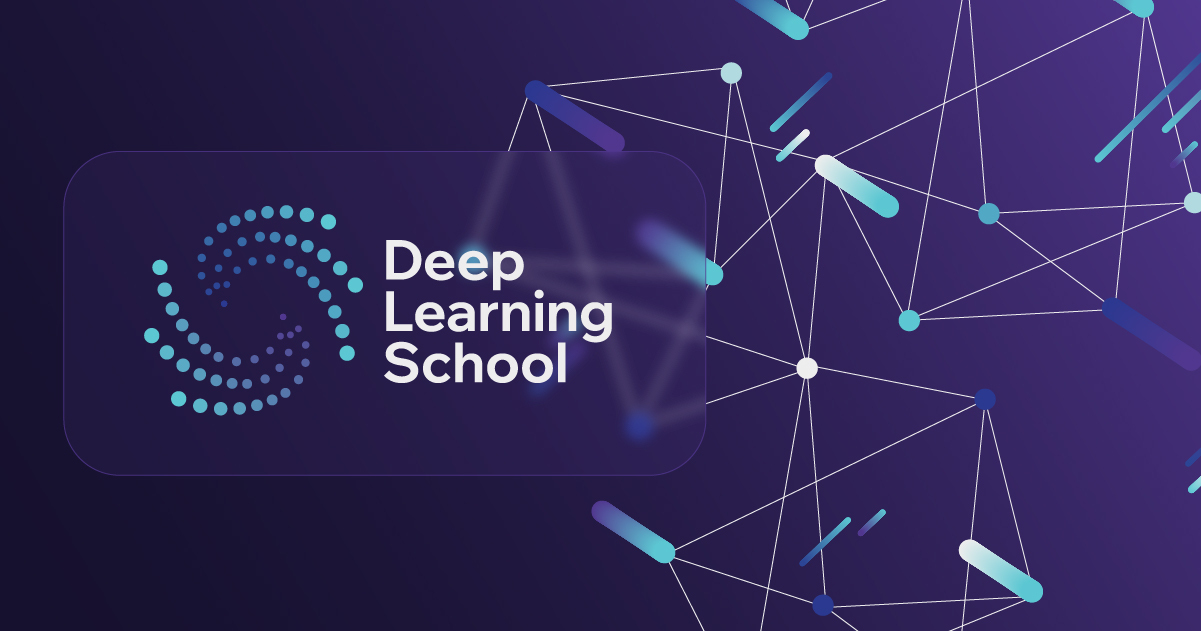

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

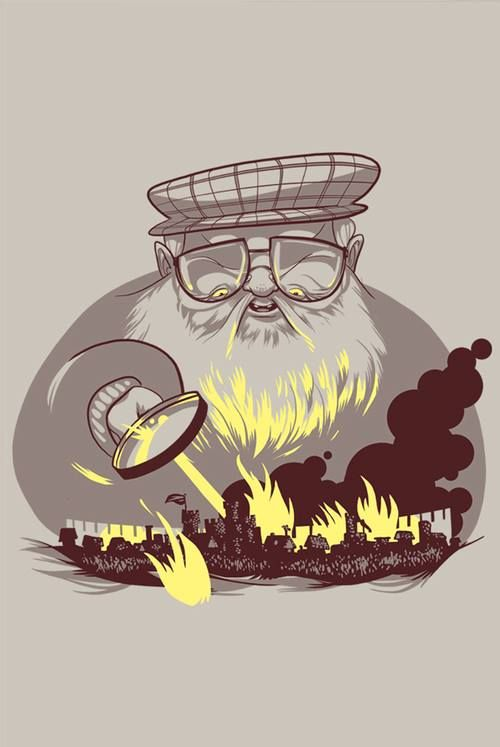

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 64.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 96.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


In [ ]:
# Для столбоцов mother, culture,  father, heir, house, spouse, title можно ввести категорию 'Пропущенно' для дальнейшего анализа
columns_skip = ['mother', 'father', 'heir', 'house', 'title', 'spouse', 'culture']
data[columns_skip] = data[columns_skip].fillna('Skipped')

In [ ]:
# Для столбцов isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse можно ввести категорию -1, которая указывает, что значение не указано
columns_skip_float = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
data[columns_skip_float] = data[columns_skip_float].fillna('Skipped')

In [ ]:
# Для столбцов DateofBearth и age можно заполнить медианным значением
columns_numeric = ['dateOfBirth', 'age']
data[columns_numeric] = data[columns_numeric].fillna((data[columns_numeric].median()))

In [ ]:
data.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
mother,0
father,0
heir,0
house,0
spouse,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
#isPopular
threshold = 0.5
data['isPopular'] = (data['popularity'] > threshold).astype(int)

In [ ]:
#boolDeadRelations
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def replace_cultures(culture):
        if isinstance(culture, str):
            culture = culture.lower()
            for simplified_culture, variants in cult.items():
                if culture in variants:
                    return simplified_culture
        return culture

data['culture'] = data['culture'].apply(replace_cultures)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Skipped,1,skipped,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Skipped,Skipped,...,0.0,Skipped,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,rivermen,208.0,Skipped,Skipped,Skipped,House Frey,Perra Royce,...,Skipped,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,skipped,272.0,Skipped,Skipped,Skipped,House Swyft,Skipped,...,Skipped,Skipped,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,skipped,82.0,Skipped,Skipped,Skipped,House Arryn,Viserys I Targaryen,...,Skipped,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Skipped,Skipped,Skipped,House Santagar,Eldon Estermont,...,Skipped,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,skipped,272.0,Skipped,Skipped,Skipped,Skipped,Skipped,...,Skipped,Skipped,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,Skipped,0,skipped,272.0,Skipped,Skipped,Skipped,Skipped,Skipped,...,Skipped,Skipped,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,Skipped,1,skipped,272.0,Skipped,Skipped,Skipped,House Seaworth,Skipped,...,Skipped,Skipped,0,0,24.0,0,0.076923,0,0,0


In [ ]:
data.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


In [ ]:
# признаки isAliveMother, isAliveFather, isAliveHeir, mother, father, heir, spouse содержат большое количество Nan и вносят малый вклад в обучение, dateOfBorth и аge идентичны
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse', 'house'], inplace = True)

In [ ]:
data['name'].nunique()

1557

In [ ]:
#переменную name можно тоже удалить, так как все значения уникальны и не вносят вклад в обучение модели
data.drop(columns=['name'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
data['isAlive']

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


In [ ]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Классы несбалансированы

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['title', 'culture']
data = pd.get_dummies(data, columns = categorical_columns, drop_first = True)

In [ ]:
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_pentoshi,culture_qohor,culture_rivermen,culture_sistermen,culture_skipped,culture_tyroshi,culture_vale,culture_vale mountain clans,culture_valemen,culture_valyrian
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,...,False,False,False,False,True,False,False,False,False,False
2,1,208.0,1,1,1,1,1,1,1,97.0,...,False,False,True,False,False,False,False,False,False,False
3,1,272.0,0,0,0,1,0,0,1,24.0,...,False,False,False,False,True,False,False,False,False,False
4,0,82.0,0,0,0,0,0,1,1,23.0,...,False,False,False,False,True,False,False,False,False,False
5,0,276.0,0,0,0,1,0,1,1,29.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,0,1,24.0,...,False,False,False,False,True,False,False,False,False,False
1554,0,272.0,1,1,0,0,0,0,0,24.0,...,False,False,False,False,True,False,False,False,False,False
1555,1,272.0,0,1,1,1,1,0,0,24.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
numerical_columns

['male',
 'dateOfBirth',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity',
 'isAlive',
 'isPopular',
 'boolDeadRelations']

In [ ]:
data[numerical_columns].corr()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
male,1.000000,-0.015668,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.094385,0.133807,0.049588,0.027506,0.113342,-0.148290,0.080518,0.039540
dateOfBirth,-0.015668,1.000000,0.023272,0.114058,0.123821,0.172367,0.063814,-0.232998,-0.194558,-0.565281,-0.132237,-0.117975,0.332522,0.013754,-0.146830
book1,0.050526,0.023272,1.000000,0.278116,0.145458,-0.009461,0.180542,0.018072,0.041593,0.017256,0.082526,0.186818,-0.112468,0.074789,0.139291
book2,0.024079,0.114058,0.278116,1.000000,0.380968,0.102247,0.135720,0.153332,-0.033216,-0.017150,-0.004477,0.150816,-0.055998,0.001636,0.055850
book3,-0.008100,0.123821,0.145458,0.380968,1.000000,0.329153,0.226547,0.165407,0.007279,-0.030002,-0.025633,0.140993,0.018427,-0.026356,0.032889
book4,-0.101674,0.172367,-0.009461,0.102247,0.329153,1.000000,0.302338,0.141145,0.047394,-0.064155,-0.072370,0.038810,0.284014,-0.061401,-0.024038
book5,0.023022,0.063814,0.180542,0.135720,0.226547,0.302338,1.000000,0.065210,0.069338,0.010069,0.032609,0.089715,0.032531,0.000907,0.094381
isMarried,-0.094385,-0.232998,0.018072,0.153332,0.165407,0.141145,0.065210,1.000000,0.132037,0.180252,0.133491,0.241898,-0.049381,0.022525,0.197150
isNoble,0.133807,-0.194558,0.041593,-0.033216,0.007279,0.047394,0.069338,0.132037,1.000000,0.152249,0.024066,0.059233,-0.060572,-0.038279,0.054631
age,0.049588,-0.565281,0.017256,-0.017150,-0.030002,-0.064155,0.010069,0.180252,0.152249,1.000000,0.125345,0.102125,-0.179331,0.025676,0.107943


<Axes: >

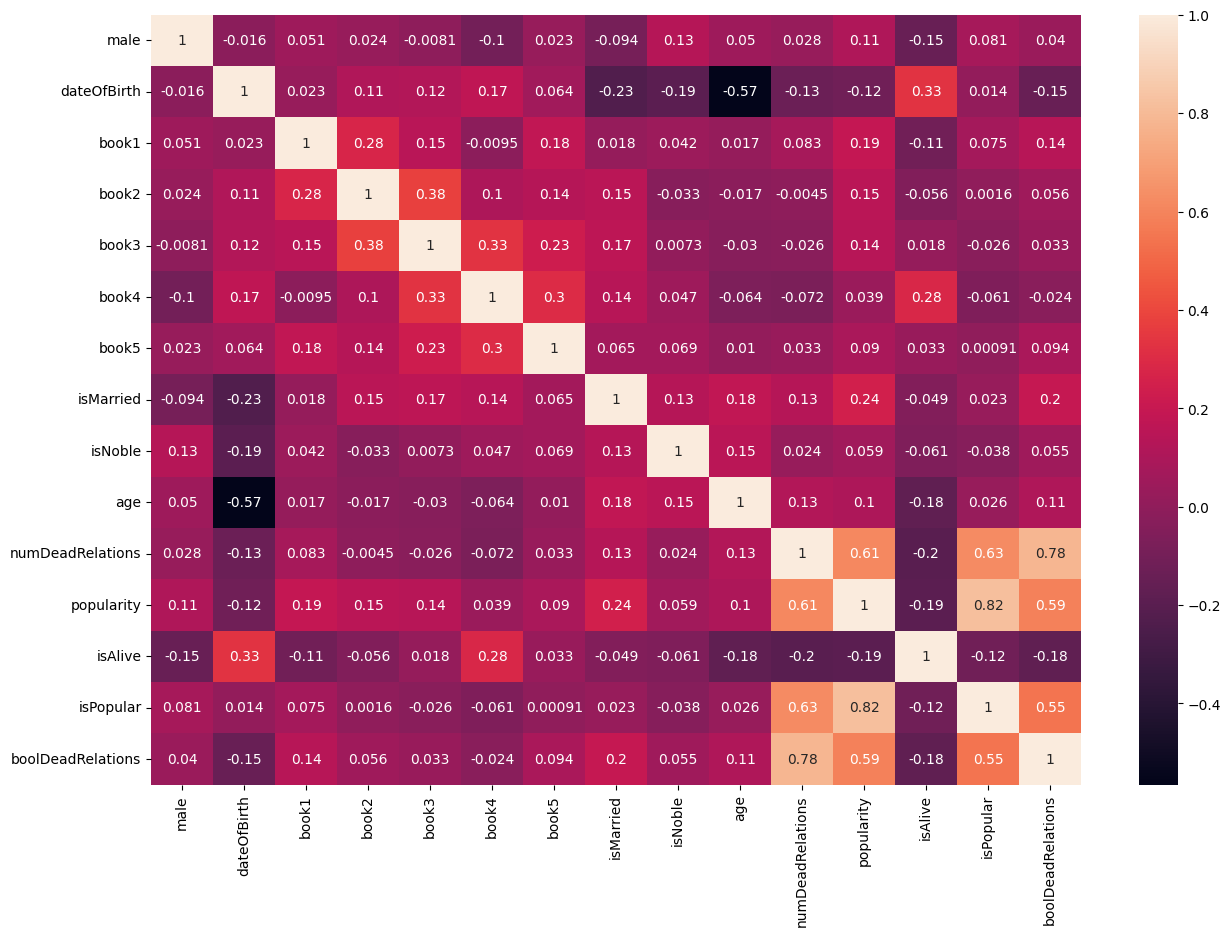

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=True)

In [ ]:
numerical_int_columns = data.select_dtypes(include=['int64']).columns.tolist()

<Axes: >

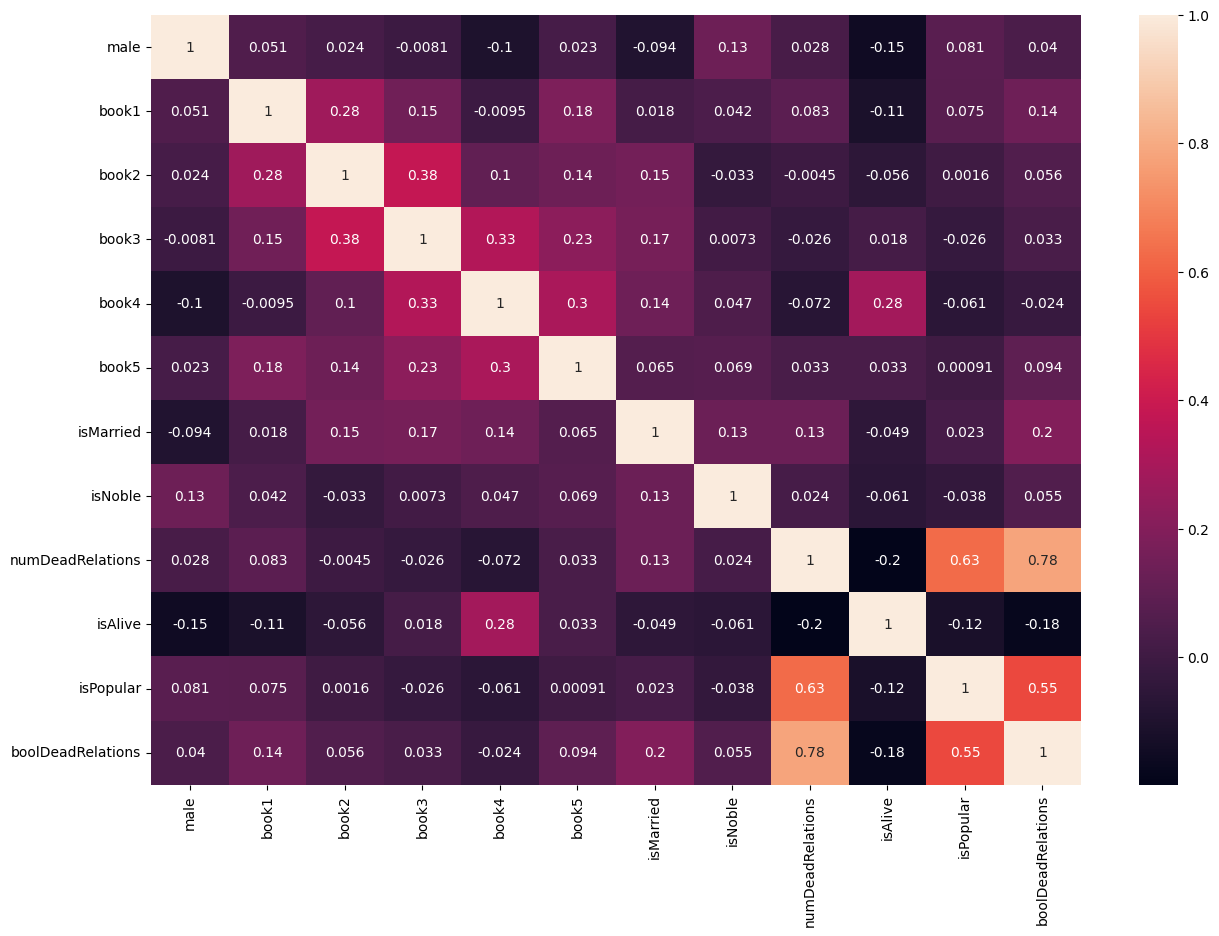

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_int_columns].corr(), annot=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

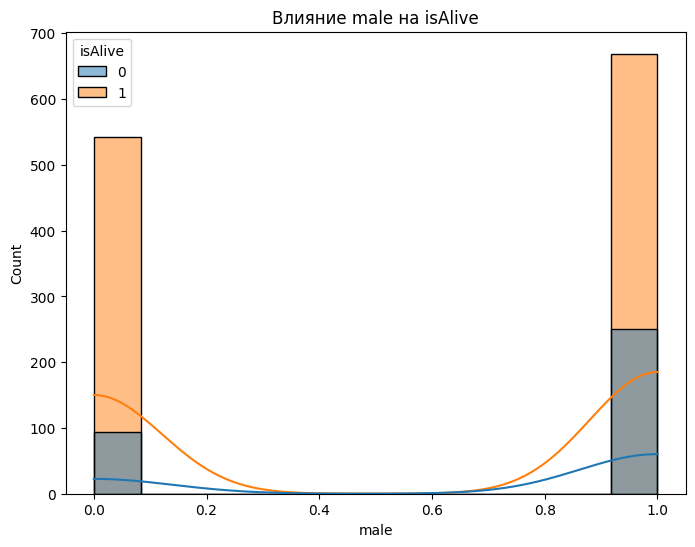

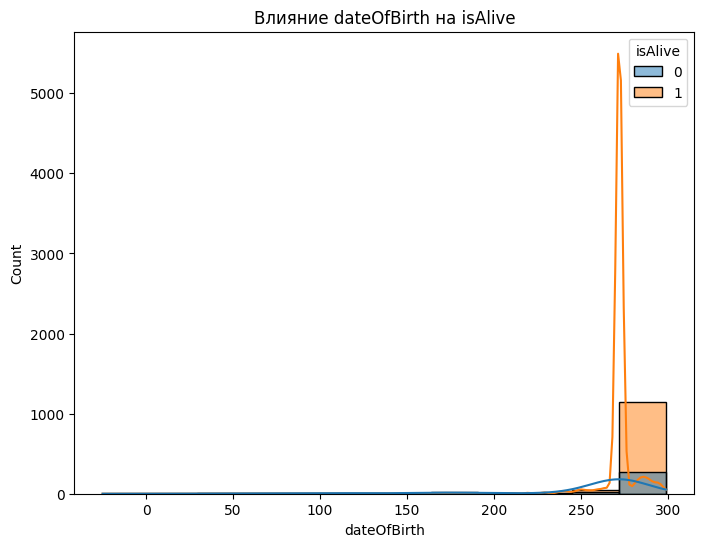

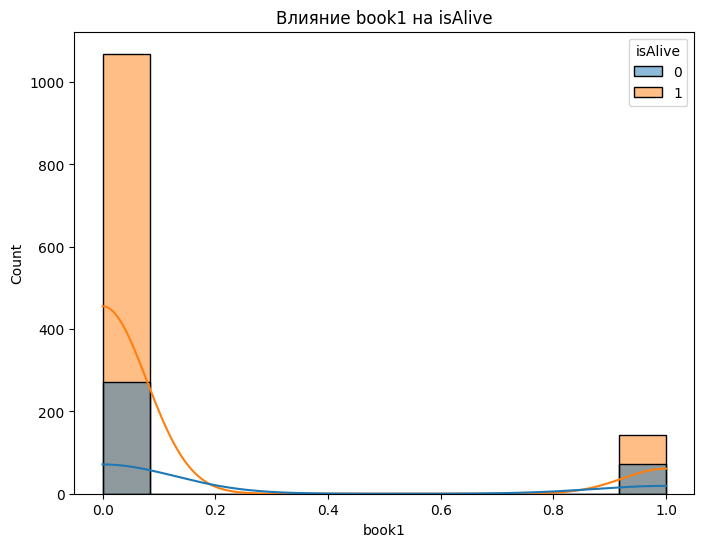

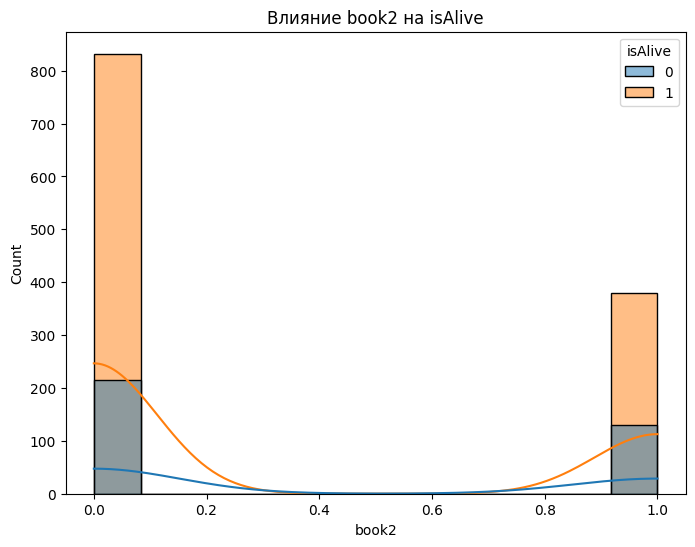

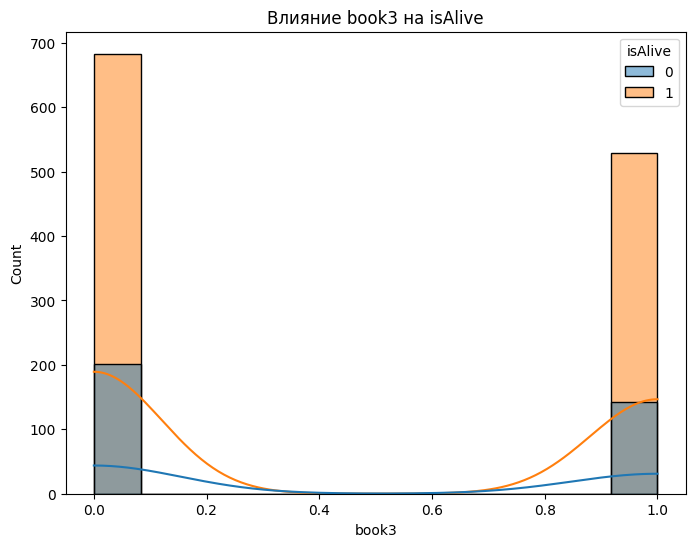

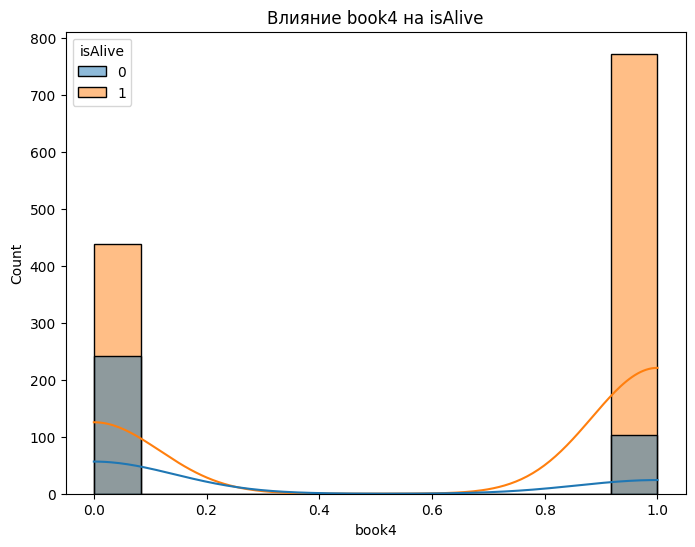

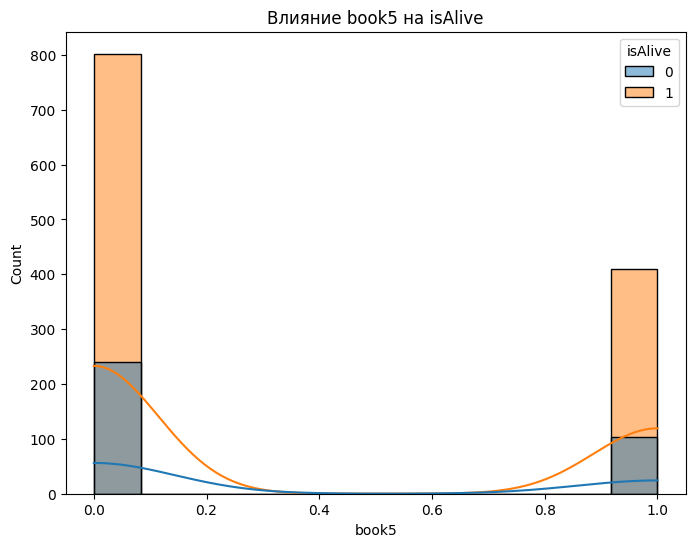

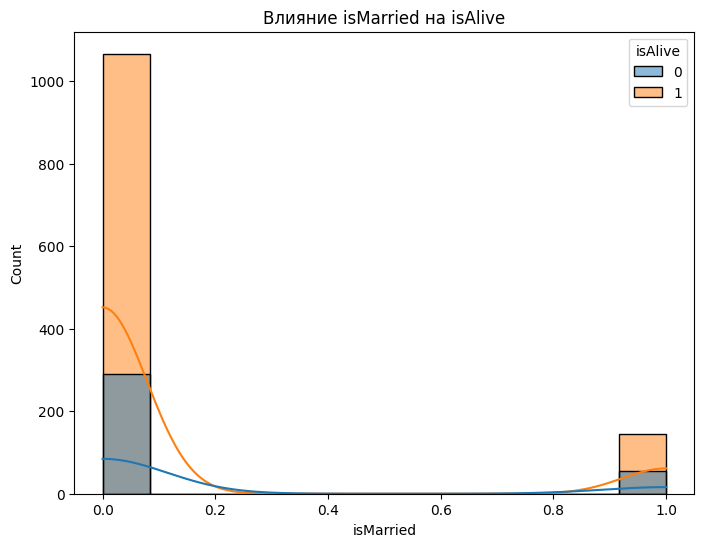

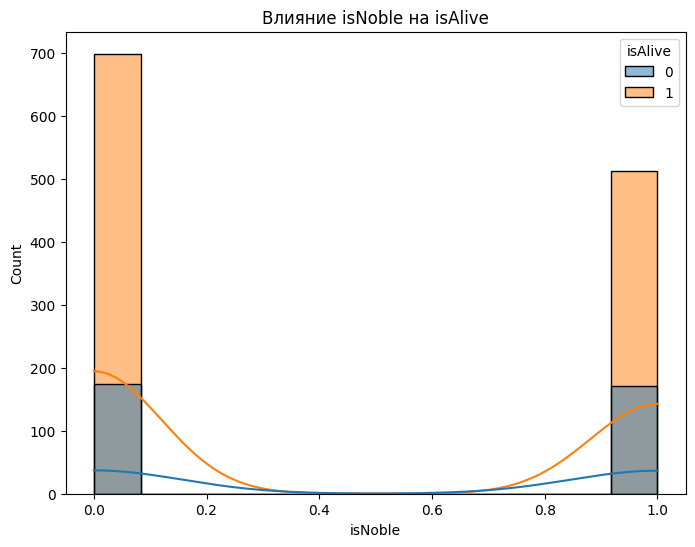

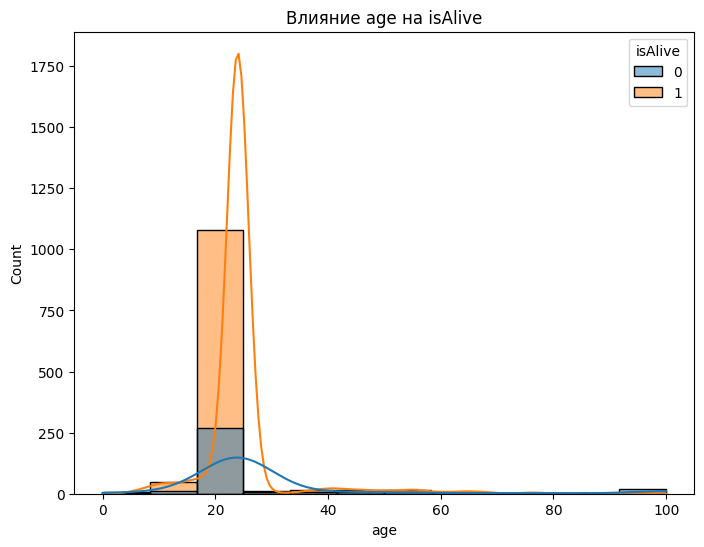

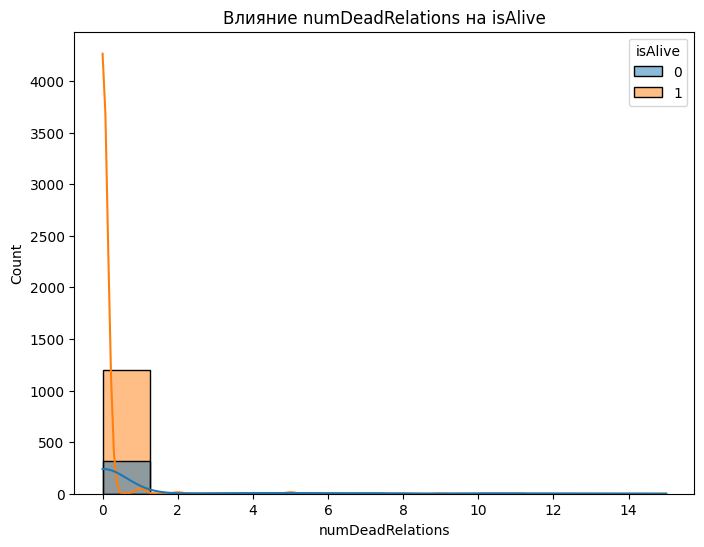

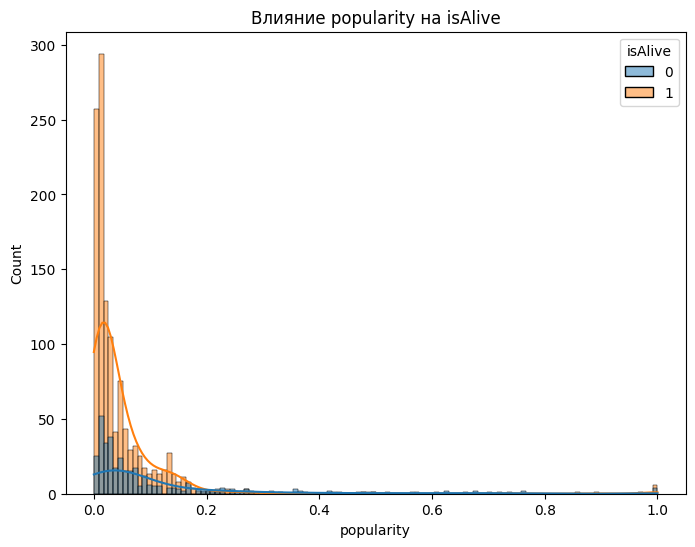

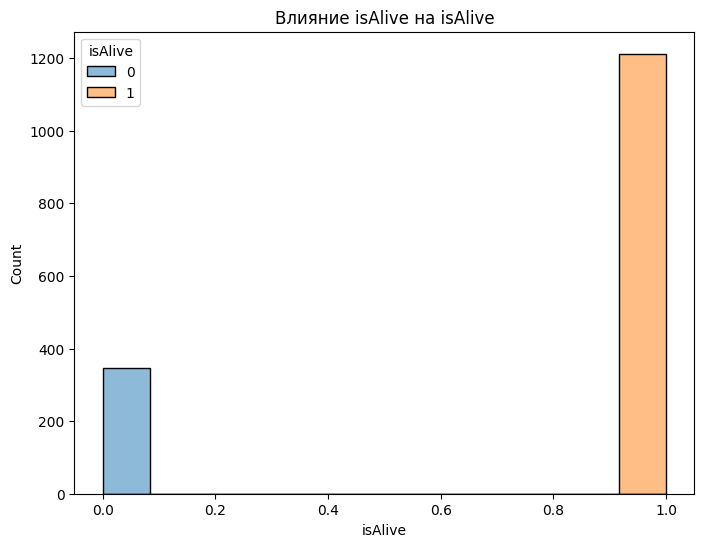

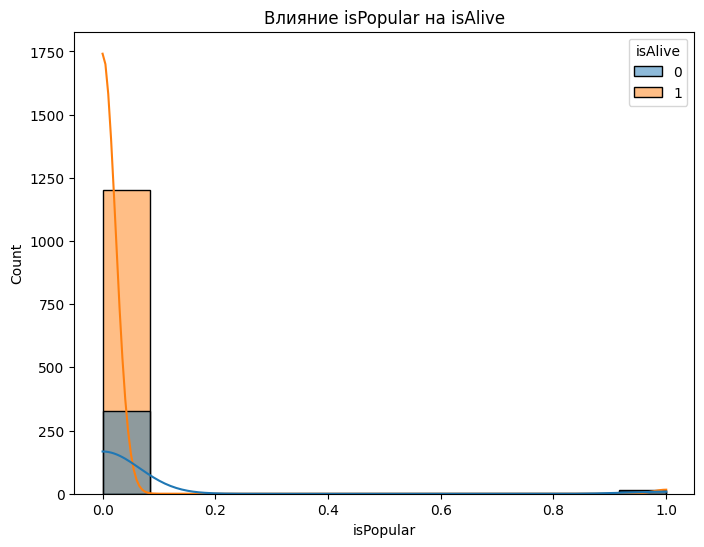

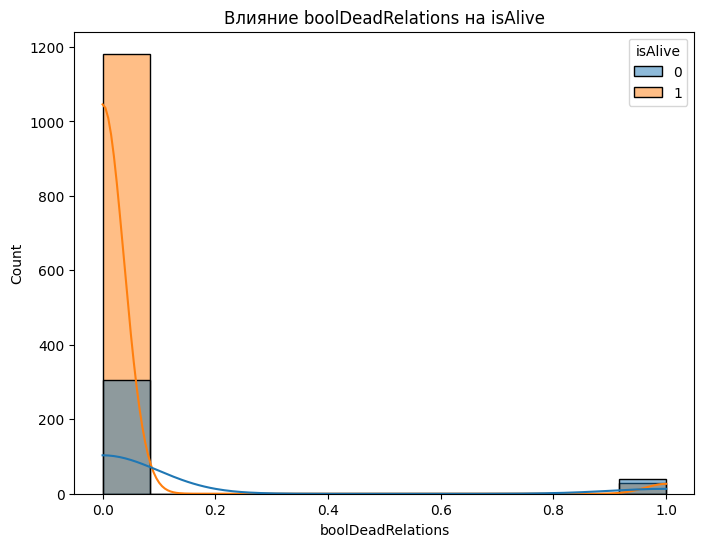

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


features_to_plot = numerical_columns
for feature in features_to_plot:
        plt.figure(figsize=(8, 6))
        sns.histplot(x=data[feature], hue=data['isAlive'], data=data, kde=True)
        plt.title(f'Влияние {feature} на isAlive')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop('isAlive', axis = 1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ab = ada_boost.predict(X_test)

In [ ]:
# Шаг 1. создание модели
rf = RandomForestClassifier()

# Шаг 2. обучение модели
rf.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_rf = rf.predict(X_test)

In [ ]:
# Шаг 1. создание модели
gaus_proc = GaussianProcessClassifier()

# Шаг 2. обучение модели
gaus_proc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gp = gaus_proc.predict(X_test)

In [ ]:
# Шаг 1. создание модели
gaus_nb = GaussianNB()

# Шаг 2. обучение модели
gaus_nb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = gaus_nb.predict(X_test)

In [ ]:
# Шаг 1. создание модели
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn.predict(X_test)

In [ ]:
# Шаг 1. создание модели
svm = SVC()

# Шаг 2. обучение модели
svm.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_svm = svm.predict(X_test)

In [ ]:
# Шаг 1. создание модели
dt = DecisionTreeClassifier()

# Шаг 2. обучение модели
dt.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_dt = dt.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy : %.4f" % accuracy_lr)

Accuracy : 0.7949


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ab = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy : %.4f" % accuracy_ab)

Accuracy : 0.8034


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_rf = rf.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy_rf)

Accuracy : 0.8098


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_gp = gaus_proc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gp = accuracy_score(y_test, y_pred_gp)
print("Accuracy : %.4f" % accuracy_gp)

Accuracy : 0.8269


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = gaus_nb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy_gnb)

Accuracy : 0.3056


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_knn = knn.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy_knn)

Accuracy : 0.8077


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_svm = svm.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy : %.4f" % accuracy_svm)

Accuracy : 0.7949


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_dt = dt.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy : %.4f" % accuracy_dt)

Accuracy : 0.7756


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.64MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [ ]:
# Для столбоцов mother, culture,  father, heir, house, spouse, title можно ввести категорию 'Пропущенно' для дальнейшего анализа
columns_skip = ['mother', 'father', 'heir', 'house', 'title', 'spouse', 'culture']
data_test[columns_skip] = data_test[columns_skip].fillna('Skipped')

In [ ]:
# Для столбцов isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse можно ввести категорию -1, которая указывает, что значение не указано
columns_skip_float = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
data_test[columns_skip_float] = data_test[columns_skip_float].fillna('Skipped')

In [ ]:
# Для столбцов DateofBearth и age можно заполнить медианным значением
columns_numeric = ['dateOfBirth', 'age']
data_test[columns_numeric] = data_test[columns_numeric].fillna((data_test[columns_numeric].median()))

In [ ]:
#isPopular
threshold = 0.5
data_test['isPopular'] = (data_test['popularity'] > threshold).astype(int)

In [ ]:
#boolDeadRelations
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def replace_cultures(culture):
        if isinstance(culture, str):
            culture = culture.lower()
            for simplified_culture, variants in cult.items():
                if culture in variants:
                    return simplified_culture
        return culture

data_test['culture'] = data_test['culture'].apply(replace_cultures)

In [ ]:
# признаки isAliveMother, isAliveFather, isAliveHeir, mother, father, heir содержат большое количество Nan и вносят малый вклад в обучение, isAliveSpouse дублирует spouse, dateOfBorth и аge идентичны
data_test.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse'], inplace = True)

In [ ]:
#переменную name можно тоже удалить, так как все значения уникальны и не вносят вклад в обучение модели
data_test.drop(columns=['name'], inplace = True)

In [ ]:
data_test.drop(columns=['house'], inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['title', 'culture']
data_test = pd.get_dummies(data_test, columns = categorical_columns, drop_first = True)

In [ ]:
data_test = data_test.reindex(columns = X.columns, fill_value=0)

In [ ]:
data_test

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_pentoshi,culture_qohor,culture_rivermen,culture_sistermen,culture_skipped,culture_tyroshi,culture_vale,culture_vale mountain clans,culture_valemen,culture_valyrian
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,0,0,100.0,...,False,False,False,0,True,False,0,False,False,False
1559,0,267.0,0,1,1,1,1,0,0,32.0,...,False,False,False,0,False,False,0,False,False,False
1560,0,267.0,0,0,1,1,0,0,0,32.0,...,False,False,False,0,True,False,0,False,False,False
1561,1,267.0,1,1,1,1,1,0,1,32.0,...,False,False,False,0,True,False,0,False,False,False
1562,1,262.0,1,1,1,1,1,1,0,38.0,...,False,False,False,0,False,False,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,267.0,1,1,1,1,1,0,0,32.0,...,False,False,False,0,False,False,0,False,False,False
1943,1,267.0,0,1,0,1,1,0,0,32.0,...,False,False,False,0,True,False,0,False,False,False
1944,1,267.0,1,1,1,1,1,0,0,32.0,...,False,False,False,0,True,False,0,False,False,False


In [ ]:
y_pred = gaus_proc.predict(data_test)

In [ ]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)